In [42]:
#Import the libraries
import math
import numpy as np 
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')


In [43]:
start = '2012-01-01'
end = '2023-12-14'
stock = 'GOOG'
df = yf.download(stock, start, end)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2023-12-07,136.600006,140.000000,136.229996,138.449997,138.449997,38419400
2023-12-08,135.660004,137.990005,135.570007,136.639999,136.639999,22990900
2023-12-11,133.820007,134.789993,132.889999,134.699997,134.699997,24502900


In [44]:
#Get the number of rows and cols
df.shape

(3007, 6)

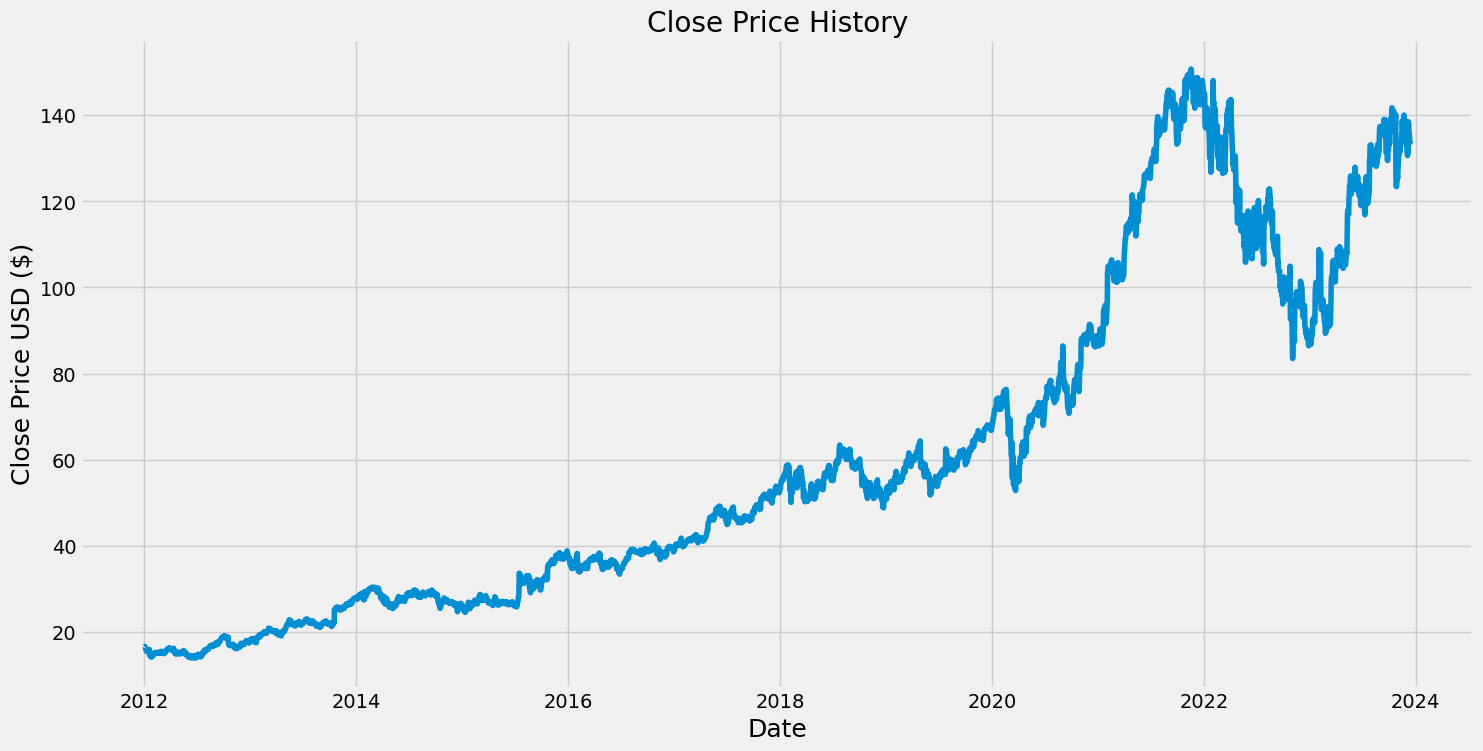

In [45]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [46]:
#Create a new dataframe with only Close column
data=df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset=data.values
#Get the number of rows to train the model
training_data_len=math.ceil(len(dataset) * .8)
training_data_len

2406

In [47]:
#Create the training data set
train_data = dataset[0: training_data_len,:]

#Scale the training data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_data = scaler.fit_transform(train_data)   
scaled_train_data

array([[0.02107112],
       [0.0216397 ],
       [0.01980321],
       ...,
       [0.9497616 ],
       [0.98545577],
       [1.        ]])

In [48]:
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(scaled_train_data)): 
    x_train.append(scaled_train_data[i-60:i, 0]) 
    y_train.append(scaled_train_data[i, 0])

In [49]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train) , np.array(y_train)

In [50]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2346, 60, 1)

In [62]:
#Build the LSTM model 
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1))) 
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [65]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2346/2346 ━━━━━━━━━━━━━━━━━━━━ 56s 21ms/step - loss: 0.0019


In [66]:
#Create the testing data set
#Create a new array containing scaled values from index 2342 to 3002
test_data=dataset[training_data_len - 60: , :]

#Scale the test data
scaled_test_data = scaler.fit_transform(test_data)   
scaled_test_data

array([[0.5506776 ],
       [0.53955727],
       [0.50911949],
       [0.51097159],
       [0.52927741],
       [0.54217562],
       [0.49975456],
       [0.47528236],
       [0.42345176],
       [0.44047821],
       [0.48078668],
       [0.4846919 ],
       [0.47131767],
       [0.47524513],
       [0.51048808],
       [0.50231331],
       [0.54811147],
       [0.54989661],
       [0.56809086],
       [0.5450171 ],
       [0.55174882],
       [0.56532383],
       [0.55897892],
       [0.5465791 ],
       [0.581651  ],
       [0.59231018],
       [0.60477697],
       [0.61113674],
       [0.63360066],
       [0.62789544],
       [0.63764707],
       [0.63290138],
       [0.62789544],
       [0.6379298 ],
       [0.62597626],
       [0.63917944],
       [0.64727975],
       [0.63927614],
       [0.65148245],
       [0.6472129 ],
       [0.64460204],
       [0.63268573],
       [0.62223483],
       [0.63789257],
       [0.67286028],
       [0.68851064],
       [0.69307042],
       [0.679

In [67]:

#Create the data sets x_test and y_test
x_test = []
y_test=dataset[training_data_len:, :]
for i in range(60, len(scaled_test_data)): 
    x_test.append(scaled_test_data[i-60:i, 0])


In [68]:
#Convert the data to a numpy array x_test = np.array(x_test)
x_test = np.array(x_test)

In [69]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_test.shape


(601, 60, 1)

In [70]:
#Get the models predicted price values
predictions = model.predict(x_test)

predictions= scaler.inverse_transform(predictions)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step


In [71]:
#Get the RMSE
n = len(y_test)
rmse = np.sqrt(np.sum((y_test - predictions) ** 2) / n)
print(rmse)

3.9991954890614827


C:\Users\HP\AppData\Local\Temp\ipykernel_6688\1254872009.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


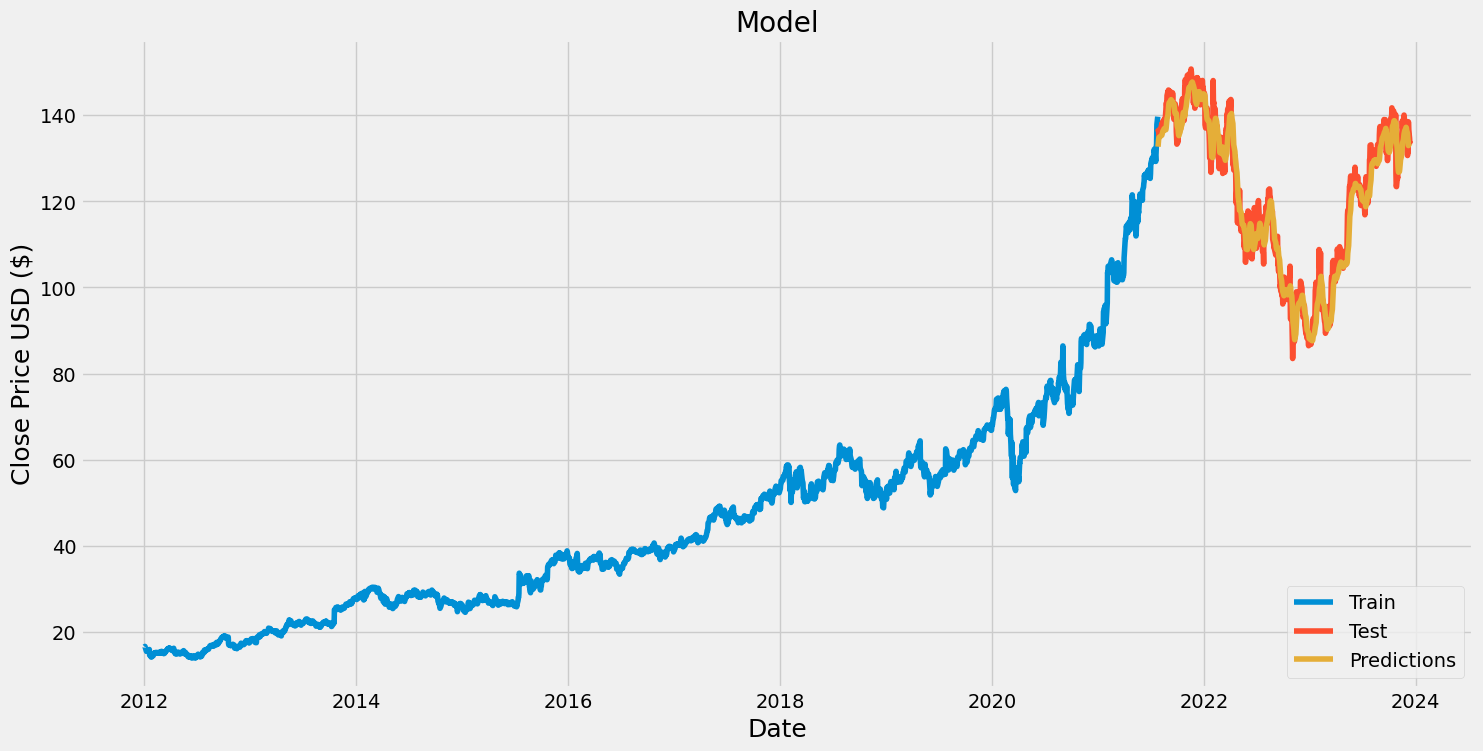

In [72]:
#Plot the data
train = data[: training_data_len] 
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [73]:
model.save('newModel.keras')